# Laboratorio 4: Aplicando K-means y K-vecinos con Sklearn.ipynb
## Acosta Imandt Daniel

In [13]:
#Importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
#Importar el archivo csv y vemos los primeros 5 registros del archivo tabulados.
dataframe = pd.read_csv("analisis.csv")
dataframe.head(5)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


## 1
Separamos el conjunto de datos en uno para entrenar el modelo y otro para probarlo.

In [5]:
 X_train,X_test= train_test_split(dataframe, test_size=0.3, random_state=42)

In [22]:
X_test

,usuario,op,co,ex,ag,ne,wordcount,categoria
108,paugasol,41.114000,26.088231,41.884769,19.713231,11.430462,82.1769,7
67,jessicaalba,48.587099,49.637863,26.988702,9.948168,2.979542,217.1832,1
31,CourteneyCox,53.110480,20.175600,39.006080,17.206400,4.092320,118.5280,1
119,sanchezcastejon,35.420439,26.267368,41.058070,24.249737,8.590877,103.7105,8
42,edans,42.444615,23.410769,45.780231,24.745615,6.748308,43.5615,6
12,aplusk,54.407727,26.992121,34.104318,18.771818,8.867197,125.3409,1
81,jtimberlake,41.929385,26.924846,41.960077,17.815385,6.549692,107.7615,2
69,JesusCalleja,45.813043,15.982935,53.545870,30.403261,5.573043,112.0435,4
104,OfficialAdele,65.067447,24.692128,25.466170,14.787447,1.030213,142.9574,2
109,PaulaMeliveo,50.898163,22.283673,38.136837,19.937347,12.289286,41.6837,5


## 2
 Con los datos de entrenatmiento ejecutamos K-Means, haciendo un pequeño análisis.

In [8]:
#Definimos la entrada
#Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo.
#Sólo cargamos las columnas op, ex y ag en nuestra variable X.
X = np.array(X_train[["op","ex","ag"]])
y = np.array(X_train['categoria'])
X.shape

(98, 3)

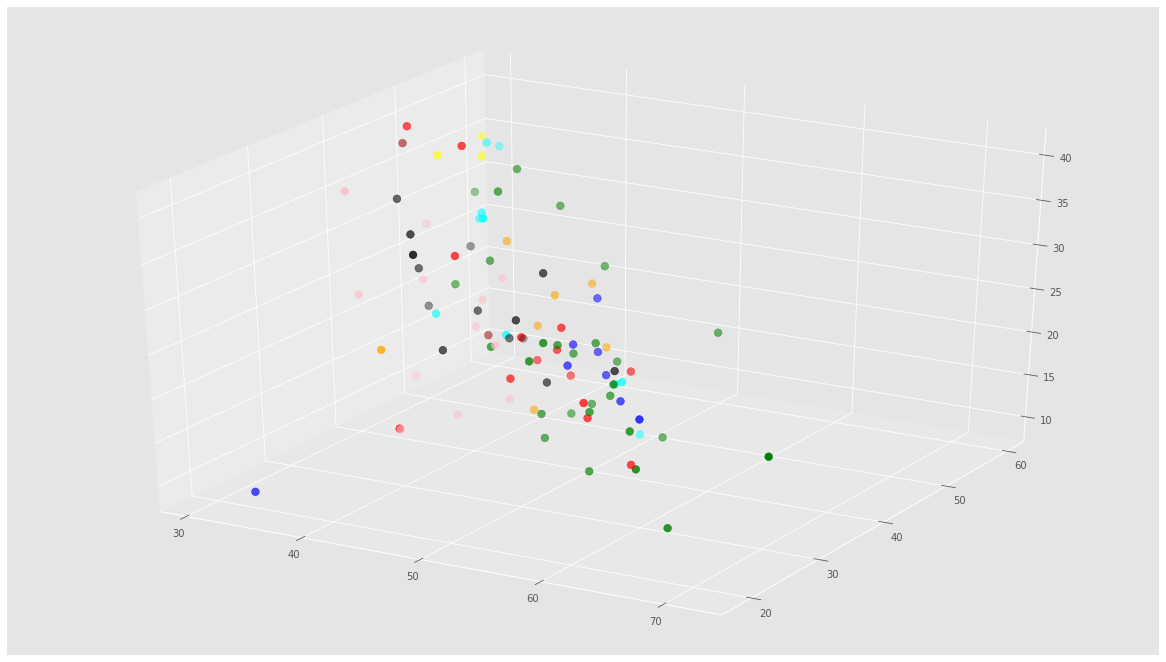

In [9]:
#Tenemos una gráfica en 3D con 9 colores representando las categorías.
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

#Veremos si con K-means, podemos “pintar” esta misma gráfica de otra manera, con clusters diferenciados.

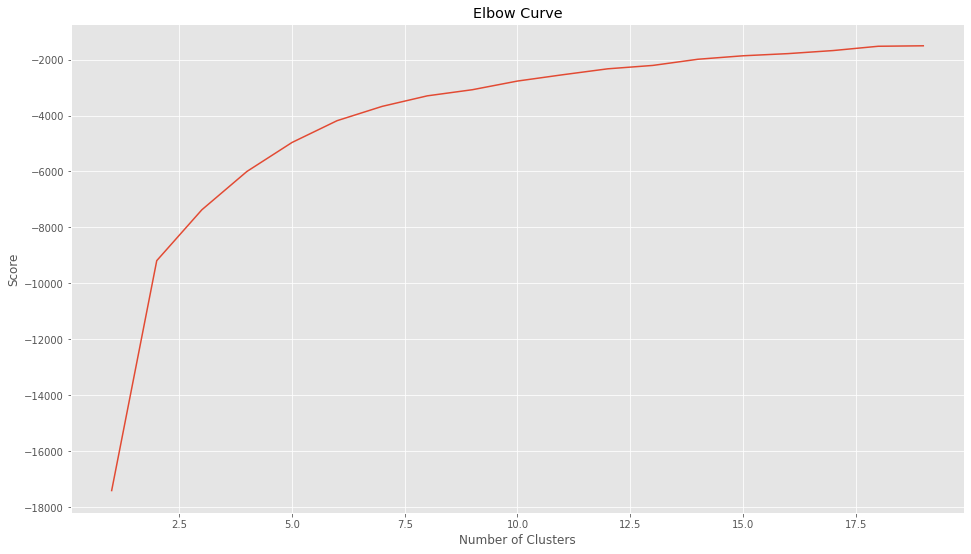

In [10]:
#Obtener el valor K
#Hallamos el valor de K haciendo una gráfica intentando hallar el “punto de codo”
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#En la siguiente referencia ver una explicación del Método del codo para la selección del número correcto de clusters k
# https://www.jacobsoft.com.mx/es_mx/k-means-clustering-con-python/

## Explicación de la selección por método del codo
A paritir de la explicación  que se nos da en las referencias, yo diría que un buen número de clusteres es el de 2, ya que es donde mejor se ve un cambio repentino en los valores del score y así mismo como el nombre lo dice es donde mejor se ve un codo.Pero por otro lado al hacer un preprocesamiento de los datos y saber cual es el objertivo de esta práctica, diría que tal vez queramos que sea mayor el número de clusteres, ya que sabemos que en total tenemos 9 categorías  y queremos ver si los podemos diferenciar por sus aptitudes, por lo que si solo lo hacemos para dos clusters no nos terminaria diciendo mucho, por lo que hay que buscar un punto medio entre 2 y 9, así que diria que 5 es un buen número.

In [11]:
#Ejecutamos K-Means
#Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[49.479626   40.87451965 17.18859123]
 [33.94415129 49.91844353 33.87006071]
 [42.24290568 32.73330532 22.40960142]
 [59.11167989 31.36554756 15.54407111]
 [39.56946305 44.07593682 24.34371555]]


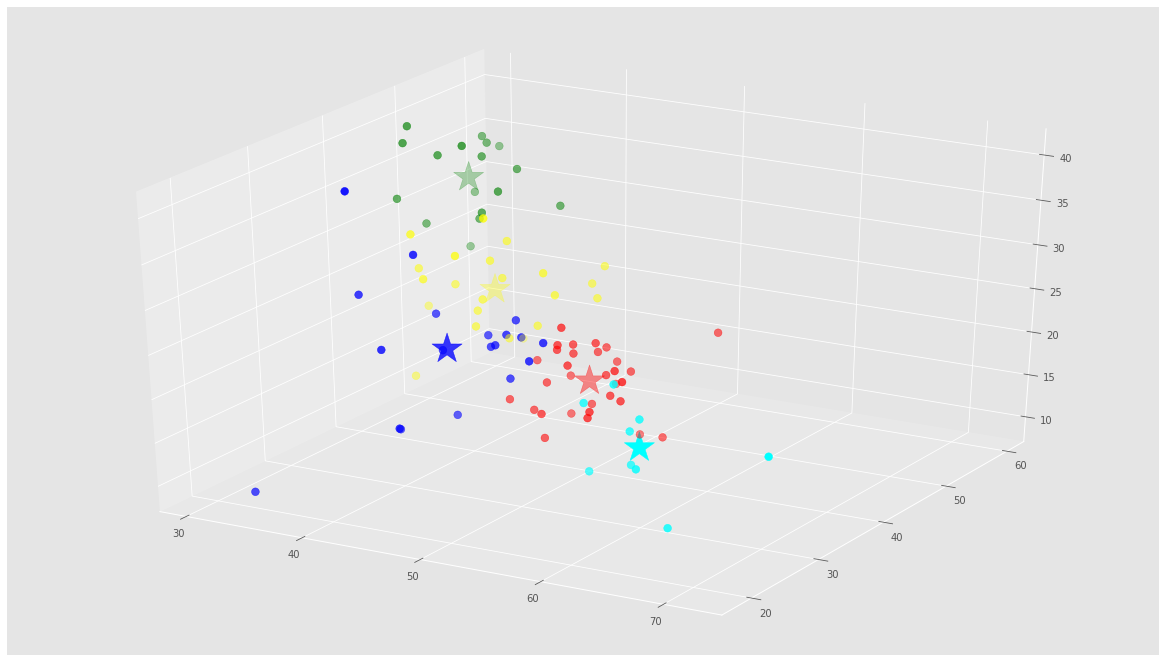

In [38]:
#Ahora se puede ver esto en una gráfica 3D con colores para los grupos y veremos si se diferencian:
# (las estrellas marcan el centro de cada cluster)

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan','yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

#Podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad,
# teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.


## 3 
Ahora agarrmos el conjunot de prueba  con K-vecinos.

In [27]:
#Definimos la entrada
#Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo.
#Sólo cargamos las columnas op, ex y ag en nuestra variable X.
Xte = np.array(X_test[["op","ex","ag"]])
yte = np.array(X_test['categoria'])
Xte.shape

(42, 3)

In [48]:
algoritmo = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 5)
algoritmo.fit(Xte, yte)


KNeighborsClassifier(p=5)

In [49]:

#Realizo una predicción
y_pred = algoritmo.predict(Xte)
y_pred

array([1, 1, 2, 8, 1, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 4, 1, 8, 2, 1, 4, 4,
       1, 4, 1, 8, 1, 4, 4, 1, 2, 4, 1, 1, 8, 1, 1, 4, 8, 8, 1, 4])

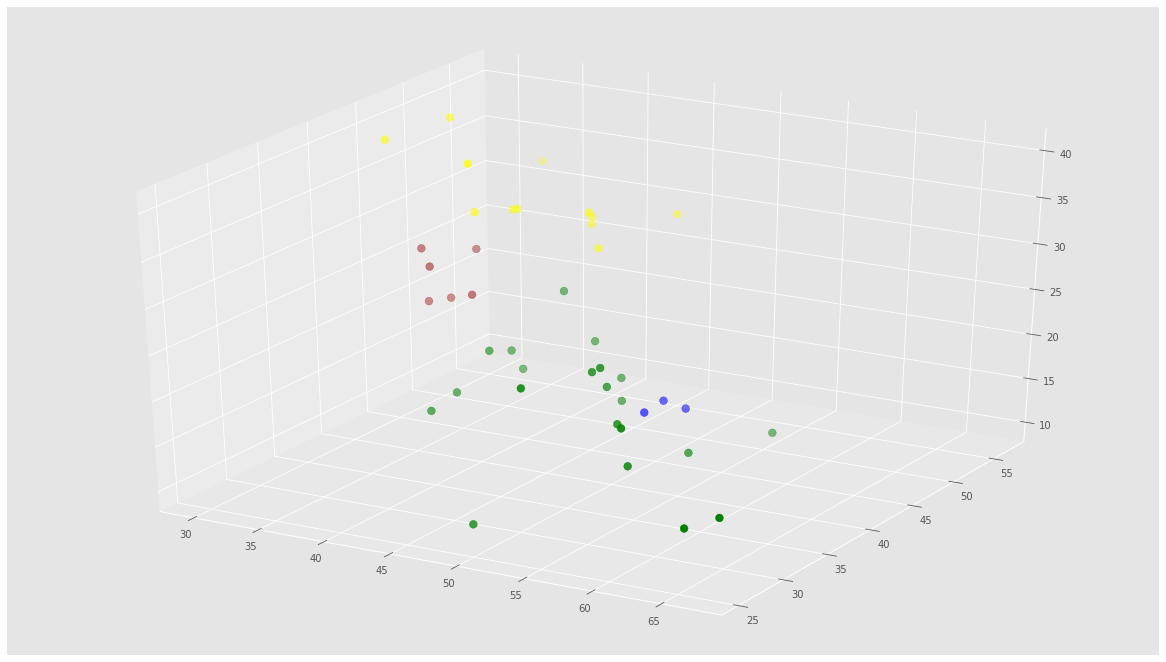

In [50]:
#Ahora se puede ver esto en una gráfica 3D con colores para los grupos y veremos si se diferencian:

# Predicting the clusters
y_pred = algoritmo.predict(Xte)

colores = ['red','green','blue','cyan','yellow','gray','black','purple','brown','darkblue']
asignar = []
for row in y_pred:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Xte[:, 0], Xte[:, 1], Xte[:, 2], c=asignar,s=60)

#Podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad,
# teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.